# Travel Insurance

By: Matthew Tirtasaputra

# Business Problem Understanding

## Context
Travel Insurance adalah produk asuransi yang dirancang untuk memberikan perlindungan terhadap berbagai risiko dan kerugian finansial yang dapat terjadi selama seseorang bepergian, baik di dalam maupun luar negeri. Perlindungan ini mencakup hal-hal seperti pembatalan perjalanan, kehilangan bagasi, biaya medis darurat, dan evakuasi. Seiring meningkatnya minat masyarakat untuk bepergian, permintaan akan travel insurance juga terus bertambah. Bagi perusahaan asuransi, kemampuan untuk memprediksi nasabah mana yang berpotensi mengajukan klaim menjadi sangat penting untuk manajemen risiko, penetapan harga premi yang akurat, dan menjaga profitabilitas bisnis.

## Problem Statement
Perusahaan travel insurance ingin meningkatkan efisiensi operasional dan mengelola risiko klaim dengan lebih baik. Saat ini, perusahaan belum memiliki sistem yang dapat mengidentifikasi secara proaktif nasabah mana yang memiliki probabilitas tinggi untuk mengajukan klaim. Akibatnya, perusahaan kesulitan dalam:

*   Menilai risiko setiap polis secara akurat.
*   Mengalokasikan sumber daya untuk proses investigasi klaim.
*   Menawarkan produk yang sesuai dengan profil risiko nasabah.

Oleh karena itu, tantangannya adalah **bagaimana cara membangun sebuah model yang dapat memprediksi kemungkinan seorang nasabah mengajukan klaim berdasarkan data historis mereka?**

## Goals
Berdasarkan permasalahan yang ada, proyek ini memiliki beberapa tujuan utama:


*   Tujuan Utama: Membangun model machine learning klasifikasi yang mampu memprediksi secara akurat apakah seorang nasabah akan mengajukan klaim (Claim = "Yes") atau tidak (Claim = "No").
*   Tujuan Tambahan:
1.  Mengidentifikasi faktor-faktor kunci (seperti tujuan perjalanan, durasi, usia, atau jenis produk) yang paling signifikan memengaruhi kemungkinan nasabah mengajukan klaim.
2.  Memberikan rekomendasi bisnis yang dapat ditindaklanjuti kepada perusahaan berdasarkan wawasan yang didapat dari model, misalnya untuk strategi pemasaran yang lebih tertarget atau penyesuaian premi.

## Analytic Approach:
Jadi, yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan nasabah yang mengajukan klaim asuransi perjalanan dan yang tidak.

Kemudian, kita akan membangun sebuah model klasifikasi yang bisa membantu perusahaan untuk memprediksi probabilitas seorang nasabah akan mengajukan klaim atau tidak berdasarkan data-data yang ada.

## Metric:
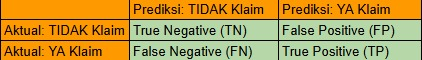
---
True Positive (TP): Model dengan benar memprediksi nasabah akan klaim.

True Negative (TN): Model dengan benar memprediksi nasabah tidak akan klaim.

False Positive (FP): Model salah memprediksi nasabah akan klaim (padahal aslinya tidak). Ini disebut juga Type I Error.

False Negative (FN): Model salah memprediksi nasabah tidak akan klaim (padahal aslinya klaim). Ini disebut juga Type II Error. Bagi bisnis, ini adalah kesalahan paling merugikan.



# Data Understanding

Catatan (Note):
* Dataset Tidak Seimbang (Imbalanced Dataset): Jumlah nasabah yang tidak mengajukan klaim (Claim = 'No') jauh lebih banyak daripada yang mengajukan klaim (Claim = 'Yes'). Hal ini perlu perhatian khusus saat evaluasi model.

* Fitur Bervariasi: Dataset ini merupakan gabungan dari fitur kategorikal (seperti Agency, Destination, Product Name) dan numerik (seperti Age, Duration, Net Sales). Beberapa fitur kategorikal memiliki nilai unik yang sangat banyak (high cardinality).

* Representasi Data: Setiap baris data merepresentasikan satu polis asuransi perjalanan yang unik, beserta informasi terkait pemegang polis dan detail perjalanannya.

## Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Agency | Text | Nama agensi yang menjual polis asuransi |
| Agency Type | Text | Jenis agensi (misalnya, Airlines atau Travel Agency) |
| Distribution Channel | Text | Saluran penjualan polis (Online atau Offline) |
| Product Name | Text | Nama spesifik dari produk asuransi yang dibeli |
| Gender | Text | Jenis kelamin pemegang polis |
| Duration | Integer | Lama durasi perjalanan dalam hari |
| Destination | Text | Negara atau lokasi tujuan perjalanan |
| Net Sales | Float | Nilai penjualan bersih dari polis |
| Commision (in value) | Float | Nilai komisi yang didapat agensi dari penjualan |
| Age | Integer | 	Usia pemegang polis |
| Claim | Text | 	Status pengajuan klaim (Yes atau No) |

In [231]:
# Untuk mengolah data (membuat tabel, dll)
import pandas as pd
import numpy as np

# Untuk membuat grafik dan visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk memisahkan data latih dan data uji
from sklearn.model_selection import train_test_split

# Untuk pre-processing data (scaling dan encoding)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model Machine Learning yang akan digunakan
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Untuk evaluasi model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Mengabaikan warning agar tampilan lebih bersih
import warnings
warnings.filterwarnings('ignore')

In [232]:
# Konek Google Drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/data_travel_insurance.csv'
# Baca File
df = pd.read_csv(file_path)

# Menampilkan 5 Data pertama
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


## Data Info

In [233]:
# Mencari tipe data dan nilai yang hilang (missing values)
print("Informasi Data:")
df.info()

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


## Statistik Deskriptif

In [234]:
# Lihat statistik deskriptif untuk kolom angka (mean, min, max, dll)
print("Statistik Deskriptif:")
df.describe()

Statistik Deskriptif:


,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


## Diagram data-data yang akan dibersihkan

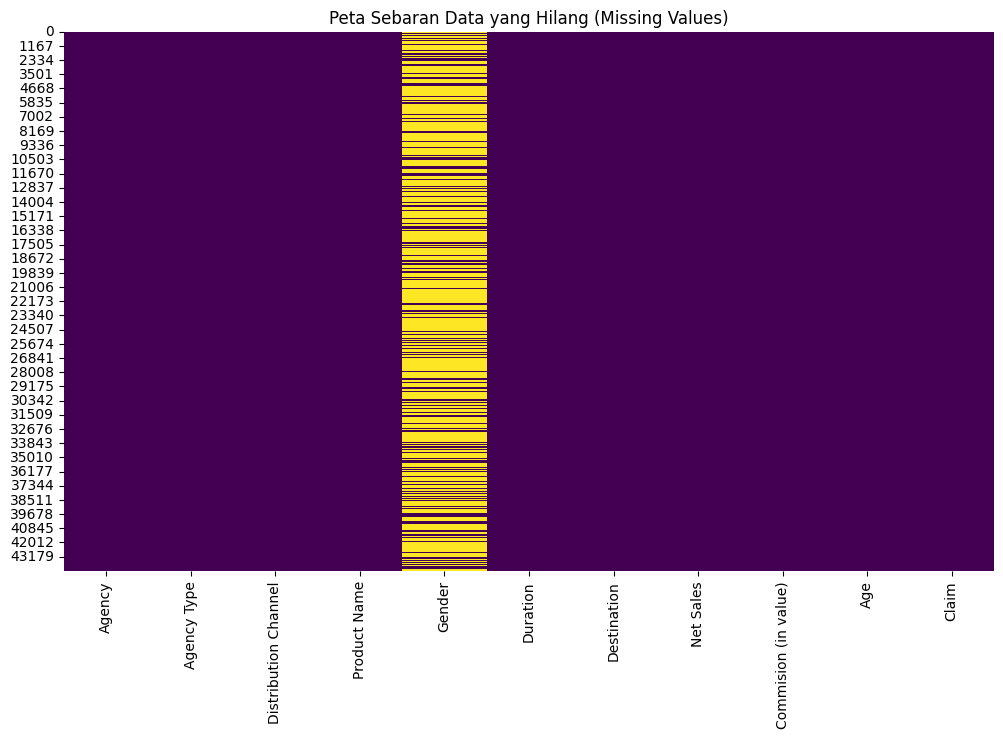

In [235]:
# Membuat heatmap dari nilai null/kosong
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Peta Sebaran Data yang Hilang (Missing Values)')
plt.show()

Pada plot di atas, setiap garis horizontal adalah baris data. Warna kuning cerah menunjukkan data yang hilang (null). Kita bisa dengan jelas melihat sebuah garis vertikal berwarna kuning hanya pada kolom Gender. Ini mengonfirmasi secara visual bahwa:

* Hanya kolom Gender yang memiliki data kosong.

* Data kosong tersebut tersebar secara acak dan tidak membentuk pola tertentu.

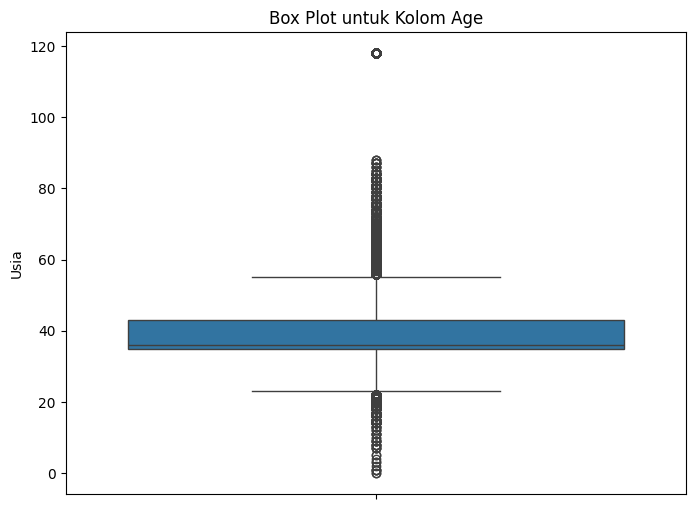

In [236]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Age'])
plt.title('Box Plot untuk Kolom Age')
plt.ylabel('Usia')
plt.show()

Pada plot usia ini, kita bisa melihat beberapa titik data di bagian paling atas yang berada sangat jauh dari kotak utama (misalnya, di atas 100). Usia di atas 100 tahun sangat jarang dan kemungkinan besar adalah outlier atau kesalahan data. Nilai ekstrem seperti ini bisa mengganggu performa model.

# Data Cleaning

In [237]:
# 1. Data kosong
print("Jumlah nilai hilang SEBELUM cleaning:")
print(df.isnull().sum())

Jumlah nilai hilang SEBELUM cleaning:
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64


Saya akan ganti data kosong dengan data modus agar data tidak kosong, saya tidak mendelete data dikarenakan data yang kosong mempengaruhi 71% dari datanya

In [238]:
modus_gender = df['Gender'].mode()[0]
df['Gender'].fillna(modus_gender, inplace=True)
print(df.isnull().sum())

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Gender                  0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64


In [239]:
# 2. Menggantikan Nilai "Age" yang lebih dari 100 menjadi median
print(df[df['Age'] > 100])
print(f"Total data AGE yang berumur lebih dari 100: {len(df[df['Age'] > 100])} ")

      Agency Agency Type Distribution Channel Product Name Gender  Duration  \
99       ART    Airlines               Online   Value Plan      M         7   
105      JZI    Airlines              Offline   Basic Plan      M        16   
363      JWT    Airlines               Online   Value Plan      F        12   
373      JWT    Airlines               Online   Value Plan      M         6   
727      JWT    Airlines               Online   Value Plan      F        76   
...      ...         ...                  ...          ...    ...       ...   
44089    JWT    Airlines               Online   Value Plan      M        42   
44140    JWT    Airlines               Online   Value Plan      M        84   
44150    JWT    Airlines               Online   Value Plan      M         5   
44160    JWT    Airlines               Online   Value Plan      M         0   
44219    JWT    Airlines               Online   Value Plan      M         5   

      Destination  Net Sales  Commision (in value) 

Saya akan menggantikan orang yang berumur lebih dari 100 menjadi median agar tidak merusak dataset

In [240]:
median_age = df[df['Age'] <= 100]['Age'].median()
df['Age'] = df['Age'].apply(lambda x: median_age if x > 100 else x)

print(f"Total data AGE yang berumur lebih dari 100: {len(df[df['Age'] > 100])} ")

Total data AGE yang berumur lebih dari 100: 0 


In [241]:
# 3. Menghapus data duplikat
initial_rows = len(df)
df.drop_duplicates(inplace=True)
print(f"Menghapus {initial_rows - len(df)} baris duplikat.")

Menghapus 4685 baris duplikat.


In [242]:
# 4. Mendelete data aneh untuk Kolom Duration
print(df[df['Duration'] < 0].head())
print(f"\nJumlah data dengan durasi negatif:  {len(df[df['Duration'] < 0])}")

      Agency Agency Type Distribution Channel Product Name Gender  Duration  \
26228    JZI    Airlines               Online   Basic Plan      M        -1   
26494    JZI    Airlines               Online   Basic Plan      M        -1   

             Destination  Net Sales  Commision (in value)   Age Claim  
26228           MALAYSIA       18.0                   6.3  36.0    No  
26494  BRUNEI DARUSSALAM       18.0                   6.3  36.0    No  

Jumlah data dengan durasi negatif:  2


Saya akan mendelete data dengan durasi yang negatif dikarenakan tidak ada durasi yang negatif

In [243]:
total_rows_before = len(df)
print(f"Jumlah sebelum dihapus: {total_rows_before}\n")

df_cleaned = df[df['Duration'] >= 0].copy()

total_rows_after = len(df_cleaned)
print(f"Jumlah setelah dihapus: {total_rows_after}\n")

print(f"Jumlah baris yang dihapus: {total_rows_before - total_rows_after}")

Jumlah sebelum dihapus: 39643

Jumlah setelah dihapus: 39641

Jumlah baris yang dihapus: 2


In [244]:
print("Info data setelah cleaning:")
df_cleaned.info()

Info data setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 39641 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                39641 non-null  object 
 1   Agency Type           39641 non-null  object 
 2   Distribution Channel  39641 non-null  object 
 3   Product Name          39641 non-null  object 
 4   Gender                39641 non-null  object 
 5   Duration              39641 non-null  int64  
 6   Destination           39641 non-null  object 
 7   Net Sales             39641 non-null  float64
 8   Commision (in value)  39641 non-null  float64
 9   Age                   39641 non-null  float64
 10  Claim                 39641 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 3.6+ MB


# Data Analysis

Saya akan visualisasikan data untuk mendapatkan insight. Fokus utama kita adalah pada ketidakseimbangan data target (Claim).

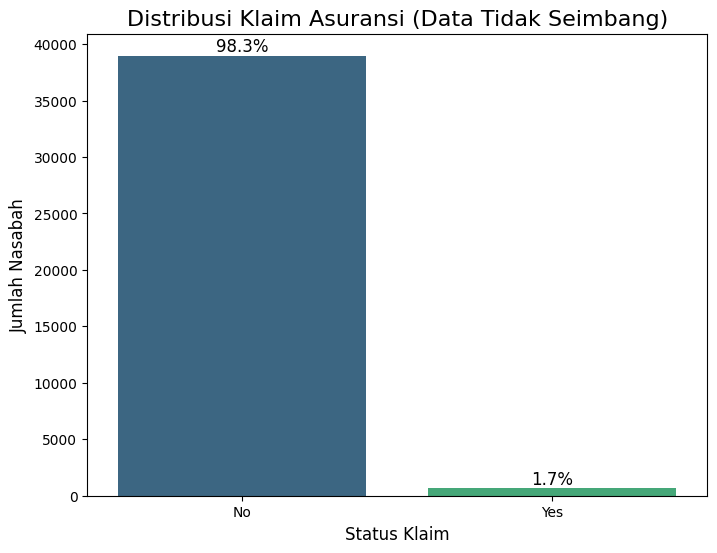

In [245]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Claim', data=df, palette='viridis')
plt.title('Distribusi Klaim Asuransi (Data Tidak Seimbang)', fontsize=16)
plt.xlabel('Status Klaim', fontsize=12)
plt.ylabel('Jumlah Nasabah', fontsize=12)
total = len(df)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.gca().annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)
plt.show()

Grafik di atas ini akan menunjukkan bahwa jumlah nasabah yang tidak klaim ('No') jauh lebih banyak daripada yang klaim ('Yes'). Ini adalah alasan utama mengapa kita tidak bisa hanya menggunakan akurasi sebagai metrik.

## Analisis Distribusi Klaim berdasarkan Fitur Kategorikal

Pada bagian ini, kita akan mengeksplorasi bagaimana status klaim ('Yes' atau 'No') didistribusikan di dalam setiap kategori dari fitur-fitur kategorikal. Ini akan membantu kita memahami apakah ada kategori tertentu dalam fitur seperti 'Agency Type', 'Distribution Channel', atau 'Gender' yang memiliki tingkat klaim yang lebih tinggi atau lebih rendah secara signifikan.

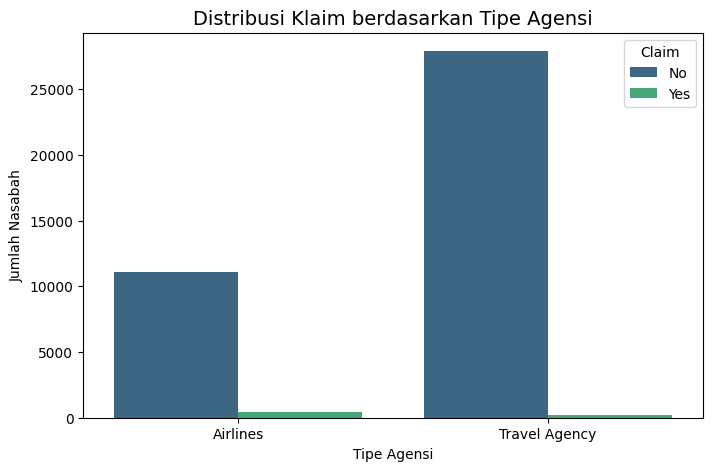

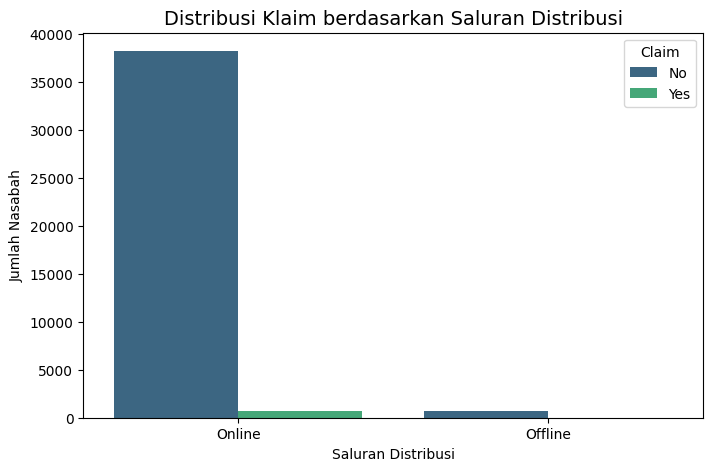

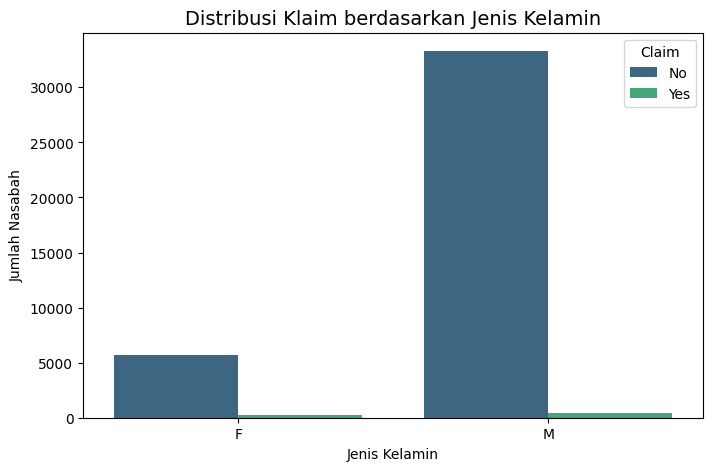

In [246]:
# Analisis Agency Type vs Claim
plt.figure(figsize=(8, 5))
sns.countplot(x='Agency Type', hue='Claim', data=df_cleaned, palette='viridis')
plt.title('Distribusi Klaim berdasarkan Tipe Agensi', fontsize=14)
plt.xlabel('Tipe Agensi', fontsize=10)
plt.ylabel('Jumlah Nasabah', fontsize=10)
plt.show()

# Analisis Distribution Channel vs Claim
plt.figure(figsize=(8, 5))
sns.countplot(x='Distribution Channel', hue='Claim', data=df_cleaned, palette='viridis')
plt.title('Distribusi Klaim berdasarkan Saluran Distribusi', fontsize=14)
plt.xlabel('Saluran Distribusi', fontsize=10)
plt.ylabel('Jumlah Nasabah', fontsize=10)
plt.show()

# Analisis Gender vs Claim
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Claim', data=df_cleaned, palette='viridis')
plt.title('Distribusi Klaim berdasarkan Jenis Kelamin', fontsize=14)
plt.xlabel('Jenis Kelamin', fontsize=10)
plt.ylabel('Jumlah Nasabah', fontsize=10)

plt.show()

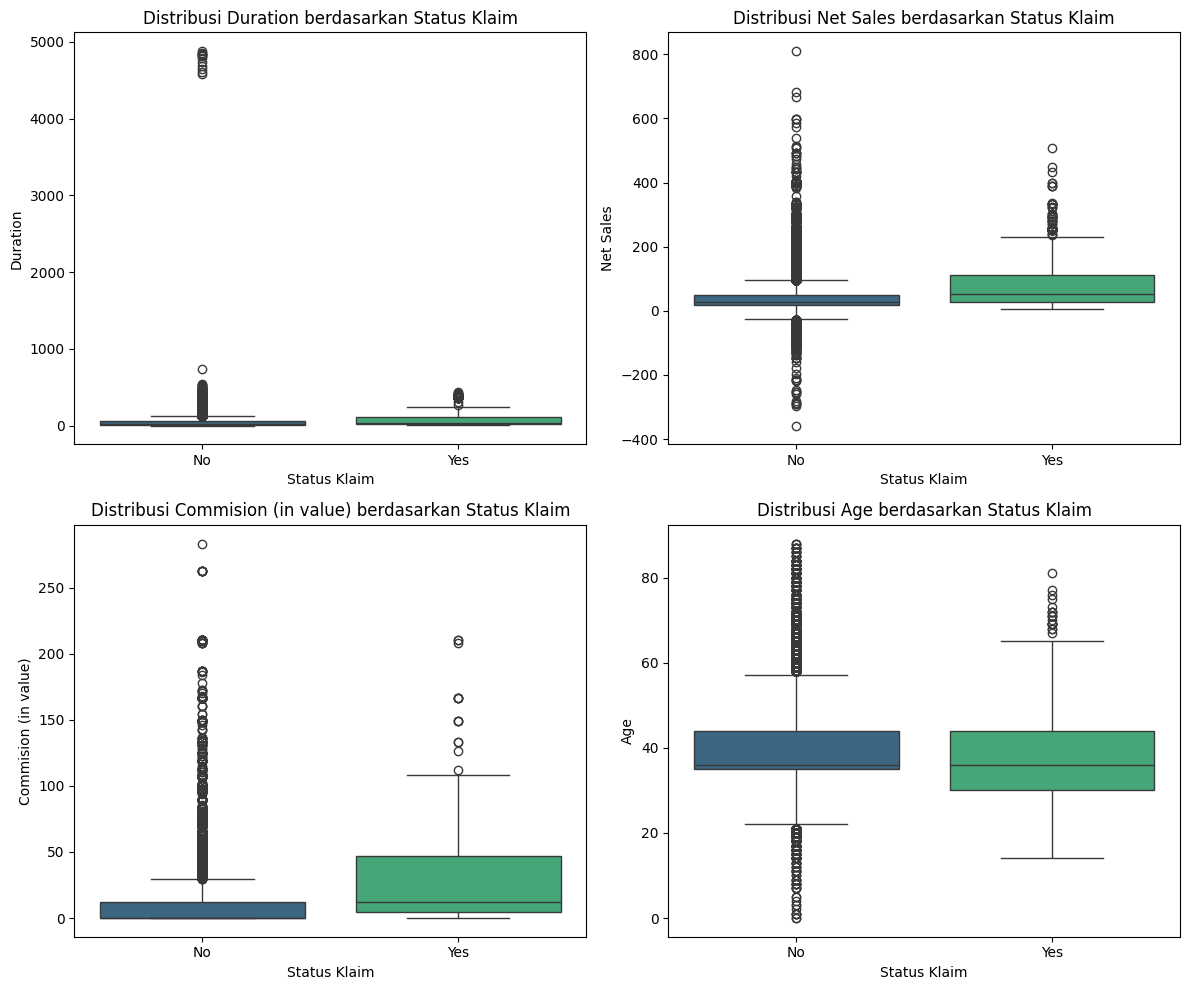

In [247]:
numeric_cols = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

n_cols = 2
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(12, n_rows * 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='Claim', y=col, data=df_cleaned, palette='viridis')
    plt.title(f'Distribusi {col} berdasarkan Status Klaim', fontsize=12)
    plt.xlabel('Status Klaim', fontsize=10)
    plt.ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

## Analisis Korelasi Antar Fitur Numerik

Untuk memahami hubungan antar fitur numerik ('Duration', 'Net Sales', 'Commision (in value)', 'Age'), kita akan membuat *heatmap* dari matriks korelasi. Nilai korelasi mendekati 1 atau -1 menunjukkan hubungan linier yang kuat.

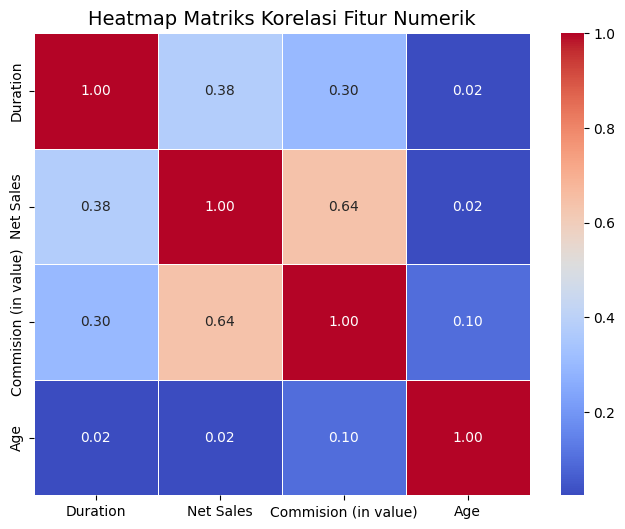

In [248]:
numeric_cols_only = df_cleaned[['Duration', 'Net Sales', 'Commision (in value)', 'Age']]

correlation_matrix_numeric = numeric_cols_only.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Matriks Korelasi Fitur Numerik', fontsize=14)
plt.show()

## Ringkasan Temuan dari Analisis Data

Berdasarkan analisis data eksplorasi yang sudah dilakukan, berikut adalah beberapa temuan kunci terkait hubungan antar fitur dan status klaim:

1.  **Ketidakseimbangan Data Target**: Dataset sangat tidak seimbang, dengan jumlah nasabah yang tidak klaim ('No') jauh lebih banyak daripada yang klaim ('Yes'). Ini menegaskan pentingnya menggunakan metrik evaluasi selain akurasi, seperti Recall dan F1-Score untuk kelas 'Yes'.
2.  **Pengaruh Tipe Agensi**: Tipe agensi ('Agency Type') tampaknya memiliki pengaruh terhadap distribusi klaim. Kita perlu perhatikan agensi mana yang memiliki proporsi klaim lebih tinggi atau lebih rendah.
3.  **Pengaruh Saluran Distribusi**: Saluran distribusi ('Distribution Channel') juga menunjukkan perbedaan distribusi klaim.
4.  **Pengaruh Jenis Kelamin**: Distribusi klaim berdasarkan jenis kelamin ('Gender') juga terlihat berbeda.
5.  **Pengaruh Durasi Perjalanan**: Dari box plot, terlihat ada perbedaan distribusi 'Duration' antara nasabah yang klaim dan tidak klaim, meskipun sebarannya cukup lebar.
6.  **Pengaruh Net Sales dan Komisi**: Fitur 'Net Sales' dan 'Commision (in value)' juga menunjukkan perbedaan distribusi antara grup klaim dan tidak klaim, mengindikasikan relevansi dalam prediksi. Terdapat korelasi positif yang cukup kuat antara 'Net Sales' dan 'Commision (in value)', yang wajar karena komisi biasanya dihitung berdasarkan nilai penjualan.
7.  **Pengaruh Usia**: Distribusi 'Age' antara grup klaim dan tidak klaim terlihat cukup mirip, dan korelasi dengan 'Claim' juga sangat rendah, menunjukkan usia mungkin tidak menjadi prediktor yang sangat kuat secara linier.

Temuan-temuan ini memberikan wawasan awal tentang fitur mana yang berpotensi paling informatif dalam membangun model prediksi klaim. Fitur kategorikal seperti 'Agency Type', 'Distribution Channel', 'Product Name', dan 'Destination' kemungkinan akan memerlukan penanganan khusus karena jumlah kategorinya yang bervariasi.

# Data Preparation

### Pemisahan Fitur dan Target

Pisahkan dataset menjadi variabel independen (fitur, X) dan variabel dependen (target, y). Target kita adalah kolom 'Claim'.

In [249]:
X = df_cleaned.drop('Claim', axis=1)
y = df_cleaned['Claim']

print("Dimensi X:", X.shape)
print("Dimensi y:", y.shape)

Dimensi X: (39641, 10)
Dimensi y: (39641,)


### Identifikasi Fitur Numerik dan Kategorikal

Kita perlu memisahkan nama kolom berdasarkan tipe datanya untuk proses *preprocessing* yang berbeda.

In [250]:
categorical_cols = X.select_dtypes(include='object').columns
numeric_cols = X.select_dtypes(include=np.number).columns

print("Fitur Kategorikal:", list(categorical_cols))
print("Fitur Numerik:", list(numeric_cols))

Fitur Kategorikal: ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Gender', 'Destination']
Fitur Numerik: ['Duration', 'Net Sales', 'Commision (in value)', 'Age']


### Penanganan High Cardinality pada Fitur Kategorikal

Beberapa fitur kategorikal ('Agency', 'Product Name', 'Destination') memiliki banyak nilai unik. Untuk menghindari terlalu banyak kolom setelah *encoding*, kita akan mengidentifikasi 15 kategori teratas berdasarkan frekuensi kemunculannya dan menggabungkan sisanya menjadi kategori 'Other'.

**Catatan**: Angka 15 bisa disesuaikan tergantung hasil analisis frekuensi dan distribusi klaim per kategori.

In [251]:
def handle_high_cardinality(df, column, top_n=15):
    # Hitung frekuensi kemunculan setiap kategori
    top_categories = df[column].value_counts().nlargest(top_n).index
    # Ganti kategori yang bukan top_n dengan 'Other'
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'Other')
    return df

# Terapkan fungsi ke kolom 'Agency', 'Product Name', dan 'Destination'
X_processed = X.copy() # Bekerja pada salinan X agar X asli tetap utuh jika perlu

X_processed = handle_high_cardinality(X_processed, 'Agency', top_n=10) # Agen teratas
X_processed = handle_high_cardinality(X_processed, 'Product Name', top_n=15) # Produk teratas
X_processed = handle_high_cardinality(X_processed, 'Destination', top_n=15) # Destinasi teratas

print("Jumlah kategori setelah penanganan high cardinality:")
for col in ['Agency', 'Product Name', 'Destination']:
    print(f"{col}: {X_processed[col].nunique()} kategori")

Jumlah kategori setelah penanganan high cardinality:
Agency: 11 kategori
Product Name: 16 kategori
Destination: 16 kategori


### Pipeline Preprocessing (Encoding dan Scaling)

Kita akan menggunakan `ColumnTransformer` untuk menerapkan *One-Hot Encoding* hanya pada fitur kategorikal (yang sudah ditangani *high cardinality*) dan *Standard Scaling* pada fitur numerik. `Pipeline` akan menggabungkan langkah *preprocessing* ini agar mudah diterapkan.

In [252]:
# Update list kolom kategorikal setelah penanganan high cardinality
categorical_cols_processed = X_processed.select_dtypes(include='object').columns

# Buat transformer untuk encoding dan scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_processed) # handle_unknown='ignore' untuk menangani kategori baru di data test
    ],
    remainder='passthrough' # Fitur lain (jika ada) tidak diubah
)

### Pembagian Data Training dan Testing

Data akan dibagi menjadi 80% untuk pelatihan dan 20% untuk pengujian. `stratify=y` penting untuk memastikan proporsi kelas target ('Claim') yang sama di kedua set, mengingat data yang tidak seimbang.

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

print("Dimensi X_train:", X_train.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_test:", y_test.shape)

print("\nDistribusi kelas di y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi kelas di y_test:")
print(y_test.value_counts(normalize=True))

Dimensi X_train: (31712, 10)
Dimensi y_train: (31712,)
Dimensi X_test: (7929, 10)
Dimensi y_test: (7929,)

Distribusi kelas di y_train:
Claim
No     0.982972
Yes    0.017028
Name: proportion, dtype: float64

Distribusi kelas di y_test:
Claim
No     0.982974
Yes    0.017026
Name: proportion, dtype: float64


### Penanganan Ketidakseimbangan Data (Oversampling dengan SMOTE)

Untuk mengatasi ketidakseimbangan data, kita akan menerapkan SMOTE (Synthetic Minority Over-sampling Technique) pada data *training* saja. SMOTE bekerja dengan menghasilkan sampel baru untuk kelas minoritas berdasarkan sampel yang sudah ada.

**Catatan**: SMOTE HANYA diterapkan pada data *training* untuk menghindari *data leakage* (informasi dari data test bocor ke data training).

In [254]:
from imblearn.over_sampling import SMOTE

print("Jumlah kelas di y_train SEBELUM SMOTE:")
print(y_train.value_counts())

# Terapkan preprocessing pada data training sebelum SMOTE
# Gunakan preprocessor yang sudah dibuat sebelumnya
X_train_processed = preprocessor.fit_transform(X_train)

# Terapkan SMOTE pada data training yang sudah diproses
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

print("\nJumlah kelas di y_train SETELAH SMOTE:")
print(y_train_smote.value_counts())

# Sekarang data training (X_train_smote, y_train_smote) sudah seimbang
# Data testing (X_test, y_test) tetap tidak seimbang, yang sesuai dengan kondisi data asli saat evaluasi model.

# Penting: Aplikasikan preprocessing juga pada X_test
X_test_processed = preprocessor.transform(X_test)

Jumlah kelas di y_train SEBELUM SMOTE:
Claim
No     31172
Yes      540
Name: count, dtype: int64

Jumlah kelas di y_train SETELAH SMOTE:
Claim
No     31172
Yes    31172
Name: count, dtype: int64


# Model Building

Pada tahap ini, kita akan membangun dan melatih model klasifikasi menggunakan data training yang sudah diproses dan diseimbangkan dengan SMOTE. Kita akan memulai dengan model Logistic Regression dan Random Forest.

### Model 1: Logistic Regression

Logistic Regression adalah model linier yang sederhana dan sering digunakan sebagai *baseline* untuk tugas klasifikasi.

In [255]:
# Inisialisasi model Logistic Regression
log_reg_model = LogisticRegression(random_state=42)

# Latih model menggunakan data training yang sudah diseimbangkan SMOTE
log_reg_model.fit(X_train_smote, y_train_smote)

print("Model Logistic Regression selesai dilatih.")

Model Logistic Regression selesai dilatih.


### Model 2: Random Forest Classifier

Random Forest adalah model berbasis *ensemble* yang cenderung memiliki performa lebih baik dan dapat menangani hubungan non-linier antar fitur.

In [256]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Latih model menggunakan data training yang sudah diseimbangkan SMOTE
rf_model.fit(X_train_smote, y_train_smote)

print("Model Random Forest selesai dilatih.")

Model Random Forest selesai dilatih.


# Model Evaluation

Sekarang kita akan mengevaluasi performa model Logistic Regression dan Random Forest pada data testing (X_test_processed, y_test). Kita akan menggunakan metrik yang relevan untuk dataset tidak seimbang: Confusion Matrix, Classification Report (termasuk Precision, Recall, F1-Score), dan Accuracy.

### Evaluasi Model Logistic Regression

In [257]:
# Prediksi pada data testing
y_pred_log_reg = log_reg_model.predict(X_test_processed)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Accuracy Score
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"\nAccuracy: {accuracy_log_reg:.2f}")

# Relevant metrics for the minority class ('Yes')
recall_log_reg_yes = recall_score(y_test, y_pred_log_reg, pos_label='Yes')
precision_log_reg_yes = precision_score(y_test, y_pred_log_reg, pos_label='Yes')
f1_log_reg_yes = f1_score(y_test, y_pred_log_reg, pos_label='Yes')

print(f"Recall (Claim='Yes'): {recall_log_reg_yes:.2f}")
print(f"Precision (Claim='Yes'): {precision_log_reg_yes:.2f}")
print(f"F1-Score (Claim='Yes'): {f1_log_reg_yes:.2f}")


Confusion Matrix:
[[6209 1585]
 [  37   98]]

Classification Report:
              precision    recall  f1-score   support

          No       0.99      0.80      0.88      7794
         Yes       0.06      0.73      0.11       135

    accuracy                           0.80      7929
   macro avg       0.53      0.76      0.50      7929
weighted avg       0.98      0.80      0.87      7929


Accuracy: 0.80
Recall (Claim='Yes'): 0.73
Precision (Claim='Yes'): 0.06
F1-Score (Claim='Yes'): 0.11


### Evaluasi Model Random Forest

In [258]:
# Prediksi pada data testing
y_pred_rf = rf_model.predict(X_test_processed)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Accuracy Score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy: {accuracy_rf:.2f}")

# Relevant metrics for the minority class ('Yes')
recall_rf_yes = recall_score(y_test, y_pred_rf, pos_label='Yes')
precision_rf_yes = precision_score(y_test, y_pred_rf, pos_label='Yes')
f1_rf_yes = f1_score(y_test, y_pred_rf, pos_label='Yes')

print(f"Recall (Claim='Yes'): {recall_rf_yes:.2f}")
print(f"Precision (Claim='Yes'): {precision_rf_yes:.2f}")
print(f"F1-Score (Claim='Yes'): {f1_rf_yes:.2f}")


Confusion Matrix:
[[7543  251]
 [ 124   11]]

Classification Report:
              precision    recall  f1-score   support

          No       0.98      0.97      0.98      7794
         Yes       0.04      0.08      0.06       135

    accuracy                           0.95      7929
   macro avg       0.51      0.52      0.52      7929
weighted avg       0.97      0.95      0.96      7929


Accuracy: 0.95
Recall (Claim='Yes'): 0.08
Precision (Claim='Yes'): 0.04
F1-Score (Claim='Yes'): 0.06


# Konklusi

Berdasarkan analisis data dan pembangunan model klasifikasi awal:

1.  **Dataset Sangat Tidak Seimbang**: Data asuransi perjalanan ini didominasi oleh nasabah yang tidak mengajukan klaim. Ini adalah tantangan utama dalam membangun model prediksi klaim.
2.  **Beberapa Fitur Berpotensi Relevan**: Analisis awal menunjukkan bahwa fitur kategorikal seperti Tipe Agensi, Saluran Distribusi, dan Jenis Kelamin, serta fitur numerik seperti Durasi Perjalanan, Nilai Penjualan Bersih (*Net Sales*), dan Komisi (*Commision (in value)*), memiliki perbedaan distribusi antara nasabah yang klaim dan tidak klaim.
3.  **Model Awal Menunjukkan Trade-off**: Model Logistic Regression, setelah di-*oversample* dengan SMOTE, menunjukkan kemampuan yang cukup baik dalam menangkap kasus klaim (Recall 0.73), namun dengan Precision yang masih rendah (0.06), artinya banyak prediksi positif yang sebenarnya adalah *False Positive*. Model Random Forest menunjukkan akurasi keseluruhan tinggi (0.95) tetapi sangat buruk dalam memprediksi kasus klaim (Recall 0.08).
4.  **Fokus Metrik pada Kelas Minoritas**: Mengingat tujuan bisnis untuk mengidentifikasi nasabah yang berpotensi klaim, Recall dan F1-Score untuk kelas 'Yes' adalah metrik yang lebih relevan daripada akurasi keseluruhan. Model Logistic Regression saat ini lebih baik dalam hal Recall.

Kesimpulannya, saya sudah berhasil mengidentifikasi tantangan utama (ketidakseimbangan data) dan membangun model awal. Model Logistic Regression saat ini memberikan *recall* yang lebih baik pada data testing, meskipun dengan *false positive* yang masih tinggi. Ini menunjukkan potensi model untuk mengidentifikasi sebagian besar nasabah berisiko, tetapi perlu perbaikan untuk mengurangi prediksi yang salah.

# Rekomendasi Bisnis

Berdasarkan temuan awal dan performa model Logistic Regression, berikut adalah beberapa rekomendasi bisnis yang dapat dipertimbangkan:

1.  **Prioritaskan Investigasi Berdasarkan Probabilitas Model**: Daripada menginvestigasi semua klaim atau menggunakan aturan *rule-based* sederhana, perusahaan dapat menggunakan probabilitas hasil dari model Logistic Regression (atau model yang lebih baik setelah tuning) untuk memprioritaskan kasus yang perlu diinvestigasi lebih lanjut oleh tim klaim. Fokus pada kasus dengan probabilitas klaim tinggi untuk mengoptimalkan sumber daya.
2.  **Analisis Lebih Dalam pada False Positive**: Tingginya *false positive* pada model awal menunjukkan bahwa ada nasabah yang diprediksi klaim oleh model tetapi sebenarnya tidak. Perusahaan dapat menganalisis karakteristik nasabah di grup *false positive* ini untuk memahami mengapa model salah prediksi dan apakah ada pola yang bisa digunakan untuk *refine* aturan bisnis atau model.
3.  **Pertimbangkan Faktor Kunci yang Teridentifikasi**: Dari analisis data (dan nantinya interpretasi model terbaik), identifikasi fitur-fitur kunci yang paling memengaruhi probabilitas klaim. Gunakan wawasan ini untuk:
    *   **Penyesuaian Premi**: Jika diizinkan dan relevan secara bisnis, pertimbangkan penyesuaian premi untuk profil risiko yang lebih tinggi.
    *   **Strategi Pemasaran/Penjualan**: Fokuskan upaya penjualan produk tertentu atau melalui saluran distribusi/agensi tertentu yang memiliki tingkat klaim lebih rendah jika tujuannya adalah mengurangi risiko.
    *   **Peningkatan Produk**: Jika ada jenis produk yang secara konsisten memiliki tingkat klaim sangat tinggi, lakukan tinjauan mendalam pada fitur atau cakupan produk tersebut.
4.  **Implementasi Sistem Peringatan Dini**: Model prediksi klaim dapat diintegrasikan ke dalam sistem operasional perusahaan untuk memberikan peringatan dini ketika polis baru dibeli oleh nasabah dengan profil risiko klaim tinggi.
5.  **Iterasi dan Peningkatan Model**: Performansi model saat ini adalah titik awal. Lanjutkan proses **Model Improvement & Tuning** (seperti yang sudah direncanakan) untuk mencari model yang memiliki keseimbangan metrik yang lebih baik (Recall yang tetap tinggi dengan Precision yang lebih baik) yang lebih sesuai dengan toleransi risiko perusahaan. Evaluasi kembali rekomendasi ini setelah model terbaik didapatkan dan diinterpretasikan.

Berikut adalah kerangka presentasi yang bisa Anda gunakan, mencakup semua *requirement* yang diminta:

### Kerangka Presentasi Video Capstone Project: Prediksi Klaim Asuransi Perjalanan

**Durasi:** Maksimal 15 menit

**Konten:**

1.  **Pendahuluan (Pengenalan Proyek)**
    *   **Judul Proyek:** Travel Insurance Claim Prediction
    *   **Nama Anda**
    *   **Gambaran Umum:** Jelaskan secara singkat apa itu asuransi perjalanan dan mengapa prediksi klaim penting bagi perusahaan asuransi.

2.  **Permasalahan Bisnis (Problem Statement)**
    *   Jelaskan tantangan yang dihadapi perusahaan travel insurance: kesulitan mengidentifikasi nasabah berisiko klaim secara proaktif.
    *   Sebutkan dampak dari masalah ini (sulit menilai risiko polis, alokasi sumber daya investigasi, penawaran produk yang tidak sesuai).

3.  **Tujuan yang Ingin Dicapai (Goals)**
    *   **Tujuan Utama:** Membangun model klasifikasi yang memprediksi kemungkinan nasabah mengajukan klaim ('Yes' atau 'No').
    *   **Tujuan Tambahan:** Mengidentifikasi faktor-faktor kunci yang memengaruhi klaim, memberikan rekomendasi bisnis.

4.  **Pendekatan Analitik (Analytic Approach)**
    *   Jelaskan bahwa pendekatan yang diambil adalah analisis data untuk mencari pola dan membangun model **klasifikasi** untuk memprediksi kategori (klaim atau tidak klaim).

5.  **Pemahaman Data Awal (Initial Data Understanding)**
    *   Sebutkan sumber data (dataset travel insurance).
    *   Jelaskan jumlah baris dan kolom data.
    *   Sebutkan fitur-fitur penting yang ada (Agency, Destination, Duration, Age, Net Sales, Claim, dll.).
    *   Highlight temuan awal seperti adanya data hilang (Gender) dan outlier (Age), serta data target yang tidak seimbang.

6.  **Metrik Evaluasi (Evaluation Metrics)**
    *   Jelaskan mengapa **akurasi saja tidak cukup** untuk dataset yang tidak seimbang.
    *   Sebutkan dan jelaskan metrik yang difokuskan:
        *   **Recall (untuk kelas 'Yes'/Klaim)**: Mengapa penting untuk menemukan sebanyak mungkin nasabah yang benar-benar klaim (menghindari False Negative).
        *   **Precision (untuk kelas 'Yes'/Klaim)**: Mengapa penting untuk memastikan prediksi klaim itu akurat (mengurangi False Positive).
        *   **F1-Score (untuk kelas 'Yes'/Klaim)**: Sebagai keseimbangan antara Recall dan Precision.
        *   **Confusion Matrix**: Untuk melihat detail TP, TN, FP, FN.
    *   Hubungkan pemilihan metrik ini dengan permasalahan bisnis (meminimalkan risiko dari nasabah yang klaim).

7.  **Metode Preprocessing Data (Data Preprocessing)**
    *   Jelaskan langkah-langkah pembersihan data:
        *   Penanganan data hilang (Gender diisi modus).
        *   Penanganan outlier (Age > 100 diganti median).
        *   Penghapusan data duplikat dan durasi negatif.
    *   Jelaskan langkah-langkah persiapan data untuk model:
        *   Pemisahan fitur (X) dan target (y).
        *   Penanganan *High Cardinality* pada fitur kategorikal (Agency, Product Name, Destination) dengan menggabungkan ke 'Other'.
        *   *One-Hot Encoding* untuk fitur kategorikal.
        *   *Standard Scaling* untuk fitur numerik.
        *   Pembagian data Train dan Test dengan `stratify`.
        *   Penanganan ketidakseimbangan data pada data *training* menggunakan **SMOTE (Oversampling)**.
    *   (Opsional, jika sempat) Tunjukkan *before-after* salah satu langkah preprocessing, misalnya jumlah kategori setelah penanganan *high cardinality*.

8.  **Penjelasan Algoritma dan Cara Kerja (Algorithms)**
    *   Sebutkan model klasifikasi yang Anda coba: **Logistic Regression** dan **Random Forest**.
    *   Jelaskan secara singkat cara kerja dasar masing-masing algoritma (tidak perlu terlalu teknis, fokus pada konsep utamanya dalam klasifikasi).
    *   Jelaskan mengapa Anda memilih kedua model ini sebagai *baseline* (satu linier, satu ensemble/non-linier).

9.  **Hasil dan Evaluasi Model (Model Results & Evaluation)**
    *   Tampilkan hasil evaluasi kedua model pada data testing.
    *   Bandingkan performa Logistic Regression dan Random Forest berdasarkan metrik yang Anda fokuskan (Recall, F1-Score untuk 'Yes').
    *   Jelaskan model mana yang saat ini menunjukkan hasil yang lebih baik berdasarkan tujuan Anda (saat ini Logistic Regression lebih baik dalam Recall).
    *   Sebutkan adanya *trade-off* (misalnya, Logistic Regression Recall tinggi tapi Precision rendah).

10. **Interpretasi Model (Model Interpretation)**
    *   (Jika sudah dilakukan atau bisa dijelaskan) Sebutkan fitur-fitur apa saja yang paling signifikan memengaruhi prediksi klaim berdasarkan model terbaik Anda. (Contoh: Agency Type, Net Sales, Product Name, dll. - ini perlu dianalisis lebih lanjut di tahap berikutnya).

11. **Kesimpulan (Conclusion)**
    *   Rangkum kembali temuan utama Anda (data tidak seimbang, fitur relevan).
    *   Sebutkan model terbaik yang didapat sejauh ini dan performanya pada metrik kunci.
    *   Tekankan tantangan utama yang berhasil diidentifikasi dan ditangani (ketidakseimbangan data).

12. **Rekomendasi Bisnis (Business Recommendations)**
    *   Berikan saran konkret kepada perusahaan berdasarkan hasil model. Gunakan rekomendasi yang sudah Anda buat di notebook.
    *   Contoh: Prioritaskan investigasi kasus dengan probabilitas klaim tinggi, analisis lebih lanjut *false positive*, pertimbangkan faktor kunci (Agensi, Produk, Tujuan) dalam strategi bisnis, dll.

13. **Penutup**
    *   Ucapkan terima kasih.
    *   Sebutkan potensi pengembangan atau langkah selanjutnya (model tuning, mencoba algoritma lain, mengumpulkan data tambahan).

**Tips Tambahan untuk Video:**

*   Gunakan visualisasi (grafik, tabel) dari notebook Anda untuk mendukung penjelasan.
*   Bicaralah dengan jelas dan pastikan alurnya logis.
*   Latihan agar durasi sesuai.
*   Gunakan *screen recording* atau *slide* yang menampilkan kode dan hasil outputnya.

Semoga kerangka ini membantu Anda dalam menyiapkan video presentasi!